In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# A Notch Digital Filter (6 marks, 3/2/1)  
  Collaborators : None

A notch filter is a filter that passes almost all frequencies with unit amplitude, except for a narrow
range of frequencies centered on the rejection frequency $f_0$ (at which frequency nothing is passed).

A simple notch digital filter has a z-transform

$$ W(z) = MF(z) F(z^*)^* = M \frac{z - q}{z - p} \frac{z - q^*}{z - p^*} $$

where $M$ is a normalization factor, $q = e^{-i 2 \pi f_0 / f_s}$, $p = (1 + \epsilon) q$, $f_s$ 
is the sampling rate ($f_s = 1 / \Delta$) and $\epsilon$ is a small positive number ($0 < \epsilon \ll 1$).

 1. What are the poles and zeros of this system? Where are they located with respect to the unit
    circle? Is this a stable system? Is this filter real? 
 2. Given $f_s = 12 \text{ cycles/year}$, $f_0 = 1 \text{ cycle/year}$, $M = 1.05$ and $\epsilon = 0.05$, plot the
    power spectrum $|W(f)|^2=W(f)W(f)^\ast$ (i.e., square of amplitude spectrum). Sample densely in $[-f_s/2, \ldots, f_s/2]$ (e.g. 1000 points), where $f_s/2$ is the Nyquist frequency.
 3. What is the full-width-half-max (FWHM) value $f_\text{fwhm}$ of this notch filter (based on the plot)? Which parameter(s) should you change to make the notches sharper, i.e., $f_\text{fwhm}$ smaller?

_Hint_: For question 2, $W(f)$ is obtained by $W(z = e^{-i \omega \Delta}$). For question 3, you don't have to
compute the FWHM value analytically (although it can be done); an inspection of the discrete array of $|W(f)|^2$
vector is sufficient. Note here $f_\text{fwhm}$ is in terms of frequency (1/year), not angular frequency.

#### 1. What are the poles and zeros of this system? Where are they located with respect to the unit circle? Is this a stable system? Is this filter real?  
The poles of this system is z = p which is located outside the unit circle, and the zeros of this system is q which is located on the unit circle. Since the poles are located outside the unit circle, this system is stable. This filter is real since we added poles and zeros that are complex conjugate of the poles and zeros for original F(z).  
  
    
#### 3.  What is the full-width-half-max (FWHM) value $f_\text{fwhm}$ of this notch filter (based on the plot)? Which parameter(s) should you change to make the notches sharper, i.e., $f_\text{fwhm}$ smaller?  
 The full-width-half max $f_\text{fwhm}$ of this notch filter is about 0.1.  
 
$\epsilon$ should be changed to make the notches sharper. Increasing $\epsilon$ would make the notches sharper.

(array([408, 424, 575, 591], dtype=int64),)
fwhm is =  0.10063159651138492


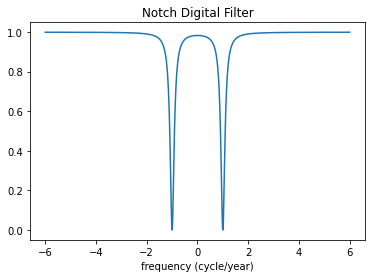

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

f_s = 12
f_0 = 1
M = 1.05
ep = 0.05
im = 1j
f = np.linspace(-f_s/2, f_s/2, 1000)

def W(z):
    q = np.exp(-im * 2 * np.pi * f_0 / f_s )
    p = (1 + ep) * q
    F_z = (np.exp(-im * 2 * np.pi * z / f_s) - q) / (np.exp(-im * 2 * np.pi * z / f_s) - p)
    cF_z = (np.exp(-im * 2 * np.pi * z / f_s) - np.conj(q)) / (np.exp(-im * 2 * np.pi * z / f_s) - np.conj(p))
    c = M * F_z * cF_z
    return c

plt.figure()
plt.plot(f,np.abs(W(f))**2)
plt.title("Notch Digital Filter")
plt.xlabel("frequency (cycle/year)")

#finding index of fwhm
w_2 = np.abs(W(f))**2
hm = np.where((0.53>=w_2) & (w_2>= 0.47))
print(hm)
# fwhm value
w = 2 * np.pi * f / f_s
print('fwhm is = ',w[424]-w[408])


# Implementing the Notch Filter (6 marks, 2/2/1/1)  
  Collaborators : None

Notch filter introduced in section 1 can be written out fully as

$$ W(z) = \frac{N(z)}{D(z)} = \frac{a + bz + cz^2}{1 + Bz + Cz^2} $$

A filter of the form above can be implemented as two filters in succession: first the 'numerator filter'
`[a b c]` as a 3-term direct convolution, then the 'denominator filter' as the inverse filter of the 3-term
filter `[1 B C]` by feedback filtering.

 1. What are the values of a; b; c; B; C for the notch filter defined in question 1.2?
 2. Write a function for a general rational digital filter with numerator and denominator
    coefficients N and D which produces the filtered time series $y$ for a given input $x$,
    `y = ratFilter(N,D,x)`. 
 3. Use `ratFilter` function to determine the impulse response of this notch filter (i.e., the output
    of this filter when the input is a discrete delta function). Define the impulse using $dt=1/f_s$ and $t=0$ to $t_{max}=100$ years (i.e. $1200$ samples). Plot the impulse response from $0$ to $6$ years. Speculate on how the impulse response would change if we halve the $f_\text{fwmh}$ value.
 4. Fourier transform the impulse response to obtain the frequency response $|W(f)|$
    of this notch filter. Plot it on top of the magnitude of the theoretical spectrum calculated based on the z-transform, with $f$ ranging from $0$ to $6$ cycles per year.

#### 1.What are the values of a; b; c; B; C for the notch filter defined in question 1.2?  

$$W(z) = MF(z) F(z^*)^* = M \frac{z - q}{z - p} \frac{z - q^*}{z - p^*}$$  
where $q = e^{-i 2 \pi f_0 / f_s}$, $p = (1 + \epsilon) q, f_s = 12 \text{ cycles/year}$, $f_0 = 1 \text{ cycle/year}$, $M = 1.05$ and $\epsilon = 0.05$  

$$W(z) = M \frac{z - q}{z - p} \frac{z - q^*}{z - p^*} = \frac{M[q q^* + (-q -q^*)z + z^2]}{pp^* +(-p-p^*)z+z^2}$$  
$$W(z) = \frac{1.05[1 + (-q -q^*)z + z^2]}{1.05^2 +(-1.05q-1.05q^*)z+z^2}$$  
$$W(z) = \frac{\frac{1}{1.05} + \frac{1}{1.05}(-q -q^*)z + \frac{1}{1.05}z^2}{1 +(-\frac{1}{1.05}q-\frac{1}{1.05}q^*)z+\frac{1}{1.05^2}z^2}$$  
$$W(z) = \frac{\frac{1}{1.05} + \frac{1}{1.05}(-e^{\frac{-i \pi}{6}} - e^{\frac{i \pi}{6}})z + \frac{1}{1.05}z^2}{1 +\frac{1}{1.05}(-e^{\frac{-i \pi}{6}}-e^{\frac{i \pi}{6}})z+\frac{1}{1.05^2}z^2}$$  

$$ a = \frac{1}{1.05}, b = \frac{1}{1.05}(-e^{\frac{-i \pi}{6}} - e^{\frac{i \pi}{6}}), c = \frac{1}{1.05}, B = \frac{1}{1.05}(-e^{\frac{-i \pi}{6}}-e^{\frac{i \pi}{6}}), C = \frac{1}{1.05^2} $$  
$$ a = \frac{1}{1.05}, b = \frac{-2}{1.05}cos(\frac{\pi}{6}), c = \frac{1}{1.05}, B =  \frac{-2}{1.05}cos(\frac{\pi}{6}), C = \frac{1}{1.05^2} $$
$$ a = \frac{1}{1.05}, b = \frac{-\sqrt{3}}{1.05}, c = \frac{1}{1.05}, B = \frac{-\sqrt{3}}{1.05}, C = \frac{1}{1.05^2} $$  
  
    
#### Speculate on how the impulse response would change if we halve the fwmh value.  
The amplitude of the impulse response would be halved of the original amplitude.

[-5.995      -5.98500833 -5.97501667 ...  5.965025    5.97501667
  5.98500833]


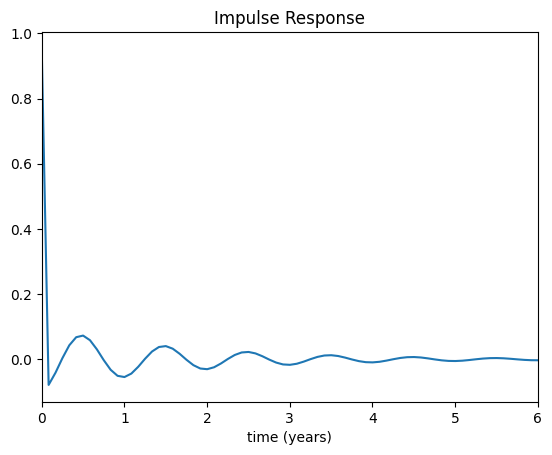

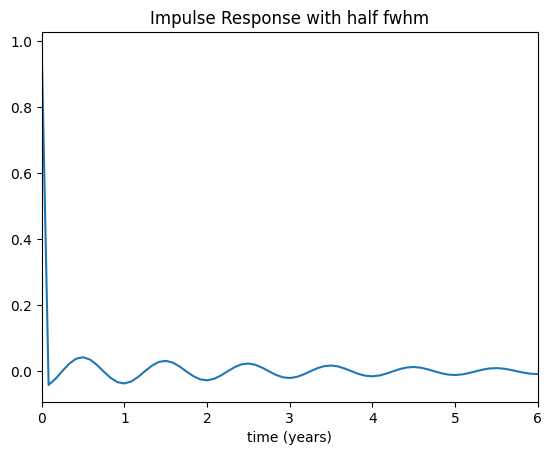

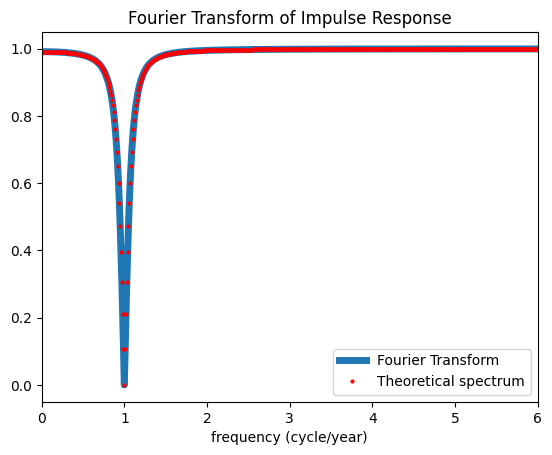

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

im = 1j
t = np.linspace(0,100,1200)
dt = t[1]-t[0]

# Define Delta Function
def delta(d):
    b = []
    for i in range(0,len(d)):
        if i == 0:
            b.append(1)
        else:
            b.append(0)
    return b

# Define ratFilter
def ratFilter(N, D, x):
    # Y(z) = X(z)W(z)
    # Y(z) = X(z)N(z)/D(z)
    # Let Q(z) = X(z)N(z)
    q = np.zeros(len(x))
    y = np.zeros(len(q))
    # q_i = n_0*x_i + sigma(n_k*x_(i-k))
    for i in range(0,len(x)):
        q[i] = N[0]*x[i]
        for k in range(1, len(N)):
            q[i] += N[k]*x[i-k]
    # y_i = 1/d_0*( q_i - sigma(d_k*y(i-k))
    for i in range(0,len(x)):
        y[i] = q[i]/D[0]
        for k in range(1, len(D)):
            y[i] -= D[k]/D[0]*y[i-k]
    return y

# Plot the impulse response from  0  to  6  years
N = [1/1.05, -(3)**(0.5)/1.05, 1/1.05]
D = [1, -(3)**(0.5)/1.05, 1/(1.05**2) ]
y = ratFilter(N,D,delta(t))
plt.figure()
plt.plot(t,y)
plt.xlim(0,6)
plt.title("Impulse Response")
plt.xlabel("time (years)")

# The impulse response halve the fwmh value
N = [1/1.025, -(3)**(0.5)/1.025, 1/1.025]
D = [1, -(3)**(0.5)/1.025, 1/(1.025**2) ]
y_h= ratFilter(N,D,delta(t))
plt.figure()
plt.plot(t,y_h)
plt.xlim(0,6)
plt.title("Impulse Response with half fwhm")
plt.xlabel("time (years)")

#Fourier Transform 
ft = np.fft.fftshift(np.fft.fft(y))
ft_x = np.fft.fftshift(np.fft.fft(delta(t)))
fre = np.fft.fftshift(np.fft.fftfreq(len(y),dt))

# Theoretical spectrum calculated based on the z-transform
im = 1j
z = np.exp(-2*np.pi*fre*dt*im)
N_z = 1/1.05-(3)**(0.5)/1.05*z+1/1.05*(z)**2
D_z = 1-(3)**(0.5)/1.05*z + 1/(1.05**2)*(z)**2 
W_z = N_z/D_z


plt.figure()
plt.plot(fre,np.abs(ft),linewidth= 5, label = 'Fourier Transform')
plt.plot(fre,np.abs(W_z), 'ro',markersize = 2, label = 'Theoretical spectrum')
plt.xlim(0,6)
plt.title("Fourier Transform of Impulse Response")
plt.xlabel("frequency (cycle/year)")
plt.legend(loc = 'lower right')

# The Mauna Loa $CO_2$ Data (6 marks, 1/1/1/1/2)  
  Collaborators : None

The provided file `co2data.py` contains carbon dioxide values (in parts per million) measured
every month at the Mauna Loa Observatory in Hawaii, from January 1965 to December 2021.
They show clearly a rising trend in atmospheric $CO_2$. The trend is overlaid with a strong annual
oscillation. Your job is to remove the annual oscillation and display the trend more clearly. There
are two possible approaches: (a) you could apply your notch filter to the series to remove this
annual variation, or (b) you could Fourier transform it with `fft`, remove the annual variation by
setting the spectrum at appropriate frequencies to zero, and transform back to the time domain with
`ifft`.

Write code to accomplish the following:

 1. Before applying the filters, it is helpful to remove the trend of the signal using numpy
    function `polyfit`. Fit a straight line to your data and then detrend your data by removing the
    straight line. Plot both the original data and the detrended data.
 2. Apply your notch filter to the detrended data and add back the trend.
 3. FT the detrended data into the frequency domain, and plot both its amplitude and phase
    spectrum. Make another plot that zooms in at $f = [0, 3.5]$ cycles per year. Now set the
    Fourier spectrum corresponding to frequencies beyond $0.9$ cycles per year to zero (keeping in mind symmetry requirements), which
    effectively removes the annual oscillation. Transform the spectrum back to time domain and
    add back the trend.
 4. Now plot the original data, the notch-filtered data from Part 2 and f-domain filtered data
    from Part 3 on top of each other with different colors. Which method gives more satisfactory
    result? But can you think of any advantages/disadvantages in using either method?
 5. Now try redo Parts 2, 3, and 4 with the original data, not the detrended data. Of course you
    don't need to add back the trend after filtering any more. Display your results and comment
    on the importance of detrending before applying the filters.

#### Which method gives more satisfactory result? But can you think of any advantages/disadvantages in using either method?  
The f-domain filtered data gives more satisfactory result. It removes almost all osciallations from the original data while the notch-filtered data could not remove the osciallations from the beginnging of the data. 

Advantage of Notch Filter:   
 1) Notch filter can remove designated frequency without eliminating it maually. 
  
    
    
Disadvantage of Notch Filter:   
 1) Notch filter cannot remove the noise at the beginning, which leads unexpectedly large amplitude of signal at the beginning.  
 
 2) Notch filter cannot prefectly remove the oscillation from a signal. In our case, it removes the frequency of 1 cycle/year and affects frequencies near 1 cycle/year.
   
     
Advantage of f-domain filter:  
 1) Only little information is lost from the signal during the transformation.  
 
 2) f-domain filter is effective on removing annual oscillation in all range.
 
 3) f-domain filter does not affect the frequencies that is not designated.
  
    
Disadvantage of f-domain filter:  
 1) The process is complicated compared to Notch filtering.  
 

#### Comment on the importance of detrending before applying the filters.  
Detrending before applying the filters is important because we could work with stationary data.  

Without detrending the data, the amplitude of osciallations in the beginning of the signal gets larger.

C:\Users\Seunghyun Park\anaconda3\envs\PHY408\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Seunghyun Park\anaconda3\envs\PHY408\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Carbon Oxide value in Mauna Loa Observatory ')

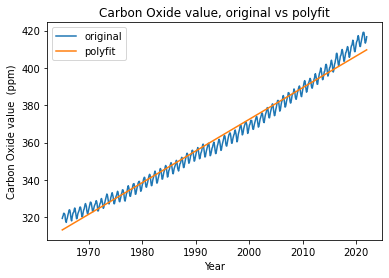

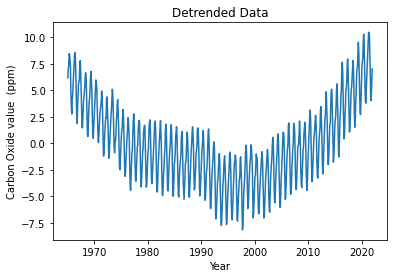

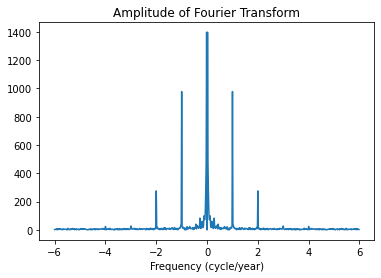

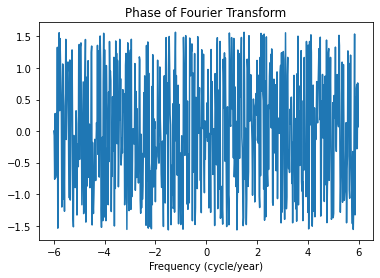

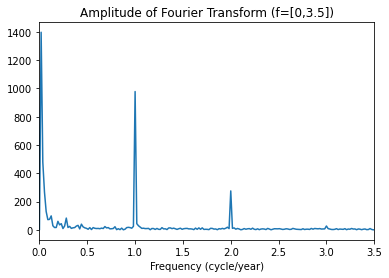

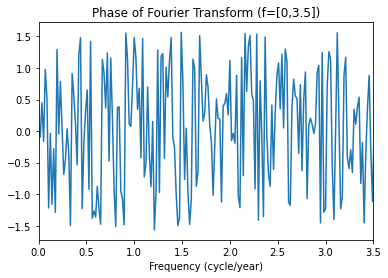

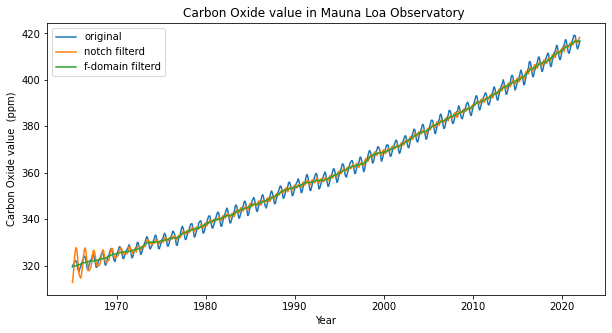

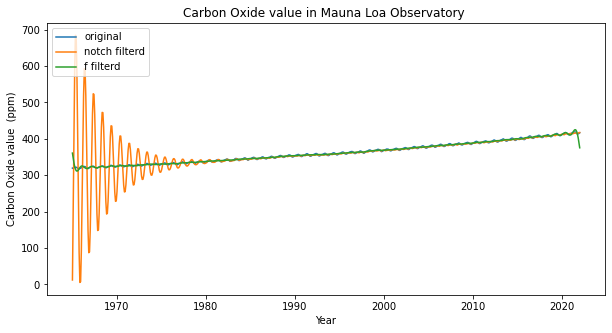

In [5]:
from co2data import *
import numpy as np
import matplotlib.pyplot as plt

# convert date table to a data vector
co2Data = co2Values.flatten()
co2TimeRange = [1965.0411, 2021.9583]
time = np.linspace(np.min(co2TimeRange),np.max(co2TimeRange),len(co2Data))
dt = time[1]-time[0]

# Fit a straight line to the data 
p = np.polyfit(time,co2Data,1)
pf = np.polyval(p,time)
plt.figure()
plt.plot(time,co2Data, label = 'original')
plt.plot(time,pf, label= 'polyfit')
plt.title('Carbon Oxide value, original vs polyfit')
plt.xlabel('Year')
plt.ylabel('Carbon Oxide value  (ppm)')
plt.legend(loc = 'upper left')

# Detrend the data by removing the straight line
detrend = co2Data-pf
plt.figure()
plt.plot(time , detrend )
plt.title("Detrended Data")
plt.ylabel('Carbon Oxide value  (ppm)')
plt.xlabel('Year')


# Apply notch filter to the detrended data and add back the trend
det_nf = ratFilter(N, D, detrend)
co2notch = pf + det_nf


# FT the detrended data 
ft = np.fft.fftshift(np.fft.fft(detrend))
fre = np.fft.fftshift(np.fft.fftfreq(len(detrend),dt))

plt.figure()
plt.plot(fre,np.abs(ft))
plt.title('Amplitude of Fourier Transform')
plt.xlabel('Frequency (cycle/year)')
plt.figure()
plt.plot(fre,np.arctan(np.imag(ft)/np.real(ft)))
plt.title('Phase of Fourier Transform')
plt.xlabel('Frequency (cycle/year)')
plt.figure()
plt.plot(fre,np.abs(ft))
plt.title('Amplitude of Fourier Transform (f=[0,3.5])')
plt.xlabel('Frequency (cycle/year)')
plt.xlim(0,3.5) 
plt.figure()
plt.plot(fre,np.arctan(np.imag(ft)/np.real(ft)))
plt.title('Phase of Fourier Transform (f=[0,3.5])')
plt.xlabel('Frequency (cycle/year)')
plt.xlim(0,3.5) 

# set the Fourier spectrum corresponding to frequencies beyond  0.9  cycles per year to zero
for i in range(0,len(fre)):
    if np.abs(fre[i]) > 0.9:
        ft[i] = 0
        
# Transform the spectrum back to time domain and add back the trend.
ift = np.fft.ifft(np.fft.ifftshift(ft))
co2ft = pf + ift


plt.figure(figsize=(10,5))
plt.plot(time, co2Data, label='original')
plt.plot(time, co2notch, label = 'notch filterd')
plt.plot(time, co2ft, label = 'f-domain filterd')
plt.legend(loc = 'upper left')
plt.ylabel('Carbon Oxide value  (ppm)')
plt.xlabel('Year')
plt.title('Carbon Oxide value in Mauna Loa Observatory ')


# redo Parts 2, 3, and 4 with the original data, not the detrended data.
det_nf = ratFilter(N, D, co2Data)
co2notch =  det_nf
ft = np.fft.fftshift(np.fft.fft(co2Data))
fre = np.fft.fftshift(np.fft.fftfreq(len(co2Data),dt))

for i in range(0,len(fre)):
    if np.abs(fre[i]) > 0.9:
        ft[i] = 0
        
        
ift = np.fft.ifft(np.fft.ifftshift(ft))
co2ft = ift

plt.figure(figsize=(10,5))
plt.plot(time, co2Data, label='original')
plt.plot(time, co2notch, label = 'notch filterd')
plt.plot(time, co2ft, label = 'f filterd')
plt.legend(loc = 'upper left')
plt.ylabel('Carbon Oxide value  (ppm)')
plt.xlabel('Year')
plt.title('Carbon Oxide value in Mauna Loa Observatory ')